In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os, json
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz 
import graphviz
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections
from sklearn.metrics import confusion_matrix
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#data=pd.read_csv('data/Bdata_for_ML.csv',header=0) #for 54 files
data=pd.read_csv('data/Sdata_for_ML.csv',header=0)
data=data.drop(['Unnamed: 0',],axis=1)


In [2]:
data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15950 entries, 0 to 15949
Data columns (total 248 columns):
is_starred                          bool
goal                                float64
usd_pledged                         float64
pledge_perc                         float64
staff_pick                          bool
launched_at_hr                      int64
launched_at_day_in_month            int64
launched_at_mo                      int64
launched_at_yr                      int64
deadline_hr                         int64
deadline_day_in_month               int64
deadline_mo                         int64
deadline_yr                         int64
created_at_hr                       int64
created_at_day_in_week              int64
created_at_day_in_month             int64
created_at_mo                       int64
created_at_yr                       int64
launched-created                    int64
goal_1000                           float64
goal_500                            float64


##  Small Tree ML

In [3]:
data=data.drop(['is_starred','usd_pledged','pledge_perc', 'staff_pick',],axis=1)
mod1=data

In [4]:
print(len(mod1))
corr_df=mod1.corr()
#corr_df[corr_df['state_num']==1]
#corr_df[(corr_df<1) & ((corr_df >= 0.3) | (corr_df <= -0.3)) ]

15950


In [5]:
cor_st=corr_df.loc['state_num']
print(cor_st.nsmallest(50))
print(cor_st.nlargest(50))


goal                             -0.214177
deadline_yr                      -0.201259
created_at_yr                    -0.199914
launched_at_yr                   -0.198035
category.slug_food               -0.165347
category.slug_technology         -0.126809
category.name_Web                -0.120768
category.name_Mobile Games       -0.099420
category.name_Apps               -0.098724
category.slug_crafts             -0.093688
category.name_Food Trucks        -0.090487
category.name_Software           -0.082177
deadline-launched                -0.082168
goal_1000                        -0.082135
goal_500                         -0.082034
goal_10                          -0.081988
category.name_Restaurants        -0.074828
category.slug_journalism         -0.072481
currency_EUR                     -0.070721
category.name_Animation          -0.068526
category.slug_photography        -0.066567
category.name_Hip-Hop            -0.064780
deadline_hr                      -0.062170
category.na

In [6]:
mod1_params= ['goal','launched-created','category.slug_food','category.slug_technology']


In [7]:
Dtree_Params=mod1_params
train_df, test_df= train_test_split (mod1, test_size = 0.2, random_state=6)
Y_train = train_df["state_num"]
X_train = train_df[Dtree_Params]
Y_test=test_df["state_num"]
X_test=test_df[Dtree_Params]
tree_clf = DecisionTreeClassifier (max_depth = 3)
tree_clf.fit (X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision Tree visualization

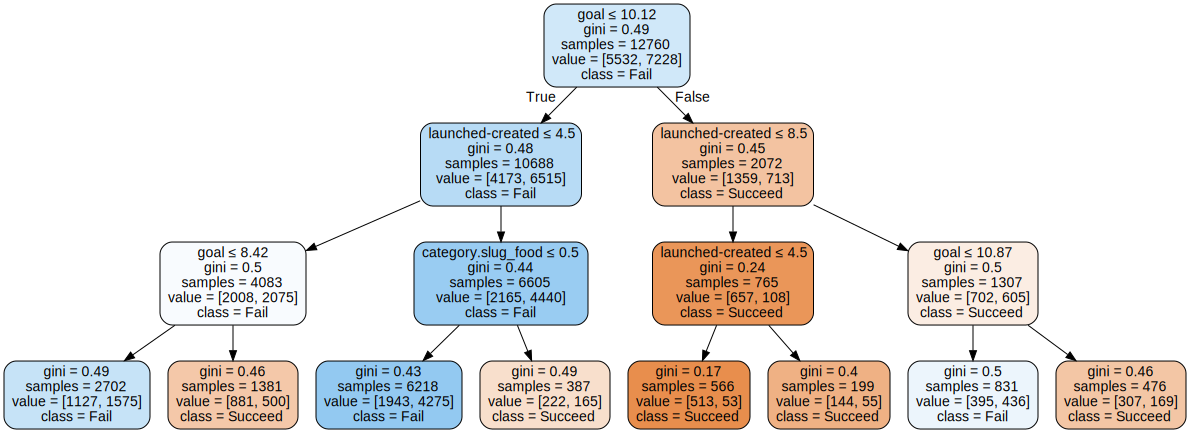

In [8]:


dot_data = export_graphviz(tree_clf, out_file = None, 
                           feature_names = Dtree_Params, 
                           class_names = ["Succeed", "Fail" ],
                           rounded = True, filled=True, special_characters=True,precision=2)
graph = graphviz.Source(dot_data) 
graph.format='png'
graph.render()
graph

In [9]:
# Run the test set through the decision tree
Y2_test_Tree_predict = tree_clf.predict (X_test)  

#Test set conf matrix
conf_matrix_Testdata = confusion_matrix(Y_test, Y2_test_Tree_predict) 
print('Test set conf matrix is',conf_matrix_Testdata)

#Train set conf. matrix
conf_matrix_Traindata = confusion_matrix(Y_train, tree_clf.predict (X_train)) 
print('Train set conf matrix is',conf_matrix_Traindata)

from sklearn.metrics import precision_score, recall_score

print("The recall for the train set is ",recall_score(Y_train, tree_clf.predict (X_train)))
print("The recall for the test set tree is ",recall_score(Y_test, Y2_test_Tree_predict))
print("The precision for the train set tree is ",precision_score(Y_train, tree_clf.predict (X_train)))
print("The precision for the test tree is ",precision_score(Y_test, Y2_test_Tree_predict))

Y_test_proba = tree_clf.predict_proba(X_test)
print('Y_test_proba[:,1] is',Y_test_proba[:,1])

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

Test set conf matrix is [[ 505  913]
 [ 221 1551]]
Train set conf matrix is [[2067 3465]
 [ 942 6286]]
The recall for the train set is  0.869673491976
The recall for the test set tree is  0.875282167043
The precision for the train set tree is  0.644651830581
The precision for the test tree is  0.629464285714
Y_test_proba[:,1] is [ 0.6875201   0.36205648  0.6875201  ...,  0.6875201   0.6875201
  0.36205648]
 Precision =  [ 0.55548589  0.5713355   0.57663025  0.59045313  0.62475595  0.62946429
  0.64365256  0.67063244  1.        ] 
 Recalls =  [ 1.          0.98984199  0.98306998  0.96331828  0.90293454  0.87528217
  0.81546275  0.60440181  0.        ] 
 Thresholds =  [ 0.09363958  0.27638191  0.35504202  0.36205648  0.42635659  0.52466907
  0.58290155  0.6875201 ]


##  Large Tree ML

In [10]:
para=mod1.drop(['state_num'],axis=1)
para.columns

Index(['goal', 'launched_at_hr', 'launched_at_day_in_month', 'launched_at_mo',
       'launched_at_yr', 'deadline_hr', 'deadline_day_in_month', 'deadline_mo',
       'deadline_yr', 'created_at_hr',
       ...
       'launched_at_day_in_week_5', 'launched_at_day_in_week_6',
       'launched_at_day_in_week_7', 'deadline_day_in_week_1',
       'deadline_day_in_week_2', 'deadline_day_in_week_3',
       'deadline_day_in_week_4', 'deadline_day_in_week_5',
       'deadline_day_in_week_6', 'deadline_day_in_week_7'],
      dtype='object', length=243)

In [11]:
Dtree_Params=para.columns
train_df, test_df= train_test_split (mod1, test_size = 0.2, random_state=6)
Y_train = train_df["state_num"]
X_train = train_df[Dtree_Params]
Y_test=test_df["state_num"]
X_test=test_df[Dtree_Params]
tree_clf = DecisionTreeClassifier (max_depth = 3)
tree_clf.fit (X_train, Y_train)

# Run the test set through the decision tree
Y2_test_Tree_predict = tree_clf.predict (X_test)  

#Test set conf matrix
conf_matrix_Testdata = confusion_matrix(Y_test, Y2_test_Tree_predict) 
print('Test set conf matrix is',conf_matrix_Testdata)

#Train set conf. matrix
conf_matrix_Traindata = confusion_matrix(Y_train, tree_clf.predict (X_train)) 
print('Train set conf matrix is',conf_matrix_Traindata)

from sklearn.metrics import precision_score, recall_score

print("The recall for the train set is ",recall_score(Y_train, tree_clf.predict (X_train)))
print("The recall for the test set tree is ",recall_score(Y_test, Y2_test_Tree_predict))
print("The precision for the train set tree is ",precision_score(Y_train, tree_clf.predict (X_train)))
print("The precision for the test tree is ",precision_score(Y_test, Y2_test_Tree_predict))

Y_test_proba = tree_clf.predict_proba(X_test)
print('Y_test_proba[:,1] is',Y_test_proba[:,1])

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

Test set conf matrix is [[ 771  647]
 [ 388 1384]]
Train set conf matrix is [[3125 2407]
 [1604 5624]]
The recall for the train set is  0.778085224128
The recall for the test set tree is  0.781038374718
The precision for the train set tree is  0.700286390238
The precision for the test tree is  0.681437715411
Y_test_proba[:,1] is [ 0.60480549  0.17002688  0.60480549 ...,  0.60480549  0.8142584
  0.17002688]
 Precision =  [ 0.55548589  0.55621859  0.60338744  0.60467588  0.60598504  0.64187551
  0.68143772  0.79399142  1.        ] 
 Recalls =  [ 1.          0.99943567  0.96501129  0.96331828  0.95993228  0.89616253
  0.78103837  0.41760722  0.        ] 
 Thresholds =  [ 0.          0.17002688  0.28846154  0.29        0.37650845  0.46023039
  0.60480549  0.8142584 ]


## Precision plot graph 

In [12]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision "+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall "+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])

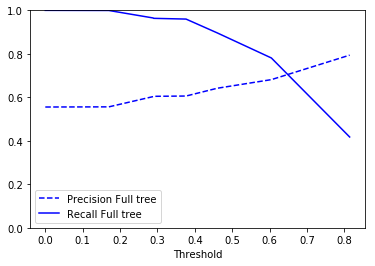

In [13]:
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="Full tree")
plt.legend(loc = "best")

## Roc Curve Plotting

In [14]:
from sklearn.metrics import roc_curve

In [15]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_proba[:,1])

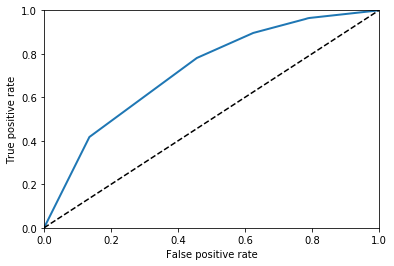

In [16]:
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
plot_roc_curve (fpr, tpr, "Full tree")
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score
print("AUC for random guess is:   ", 0.5 )
print("AUC for the Full tree is: ", roc_auc_score(Y_test, Y_test_proba[:,1]) )

AUC for random guess is:    0.5
AUC for the Full tree is:  0.721839808715


## Random forest (RF)

In [18]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 2, n_jobs= -1)
rnd_clf.fit (X_train, Y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [19]:
confusion_matrix(Y_test, y_pred_rf)

array([[ 348, 1070],
       [ 111, 1661]], dtype=int64)

In [20]:
recall_score(Y_test, y_pred_rf)

0.93735891647855529

In [21]:
precision_score(Y_test, y_pred_rf)

0.60820212376418892

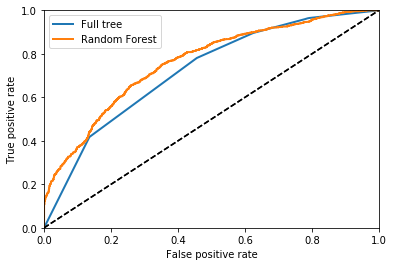

In [22]:
y_rf_proba = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_rf_proba[:,1])
plot_roc_curve (fpr, tpr, "Full tree")
plot_roc_curve (fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc = "best")
plt.show()

In [23]:
roc_auc_score(Y_test, y_rf_proba[:,1])

0.76075756876279499

In [24]:
feature_score = rnd_clf.feature_importances_
feature_score

array([  5.69087387e-02,   7.67150717e-04,   1.33852200e-04,
         9.21319378e-05,   9.12535623e-02,   2.55119433e-03,
         6.51855162e-05,   1.27448155e-04,   8.57378658e-02,
         4.99870294e-04,   7.37410442e-05,   3.58391907e-05,
         3.53055179e-04,   1.02117546e-01,   4.12484155e-02,
         5.77769125e-02,   6.89793676e-02,   5.71396344e-02,
         8.60484771e-05,   1.05684313e-04,   2.09642751e-03,
         4.69255935e-04,   1.25495895e-03,   1.58311589e-02,
         2.56312458e-02,   0.00000000e+00,   5.77362577e-04,
         0.00000000e+00,   3.09947965e-02,   3.29047984e-02,
         3.36822794e-04,   3.81414895e-04,   4.01994088e-04,
         9.43679674e-04,   0.00000000e+00,   1.78129068e-05,
         3.65609025e-04,   0.00000000e+00,   0.00000000e+00,
         2.79878089e-03,   0.00000000e+00,   1.06557719e-03,
         7.12581525e-03,   0.00000000e+00,   0.00000000e+00,
         3.23170545e-05,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [25]:
feature_names = list(X_train)
df_feature_score = pd.DataFrame(data=feature_names, columns=["feature"])
df_feature_score["score"]= feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)
#df_feature_score.head()
df_feature_score_short=df_feature_score.drop(df_feature_score.index[12:])
df_feature_score_short

,feature,score
13,created_at_yr,0.102118
4,launched_at_yr,0.091254
8,deadline_yr,0.085738
16,goal_500,0.068979
15,goal_1000,0.057777
17,goal_10,0.057140
0,goal,0.056909
14,launched-created,0.041248
185,category.slug_food,0.036669
29,name_number_of_word,0.032905


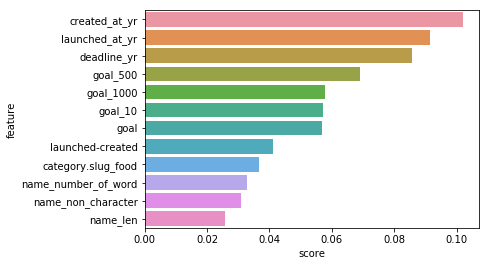

In [26]:
sns.barplot(y="feature", x="score", data=df_feature_score_short)

## GBM

In [27]:
from sklearn import ensemble

clf_gb = ensemble.GradientBoostingClassifier()
clf_gb.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [28]:
y_pred_gb = clf_gb.predict(X_test)

In [29]:
confusion_matrix(Y_test, y_pred_gb)

array([[ 920,  498],
       [ 330, 1442]], dtype=int64)

In [30]:
recall_score(Y_test, y_pred_gb)

0.81376975169300225

In [31]:
precision_score(Y_test, y_pred_gb)

0.74329896907216497

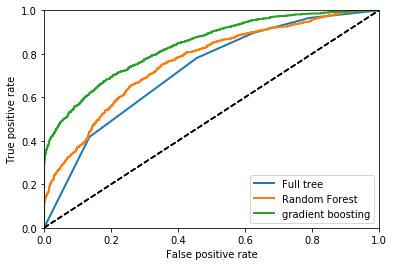

In [32]:
y_gb_proba = clf_gb.predict_proba(X_test)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(Y_test, y_gb_proba[:,1])

y_rf_proba = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_rf_proba[:,1])
plot_roc_curve (fpr, tpr, "Full tree")
plot_roc_curve (fpr_rf, tpr_rf, "Random Forest")
plot_roc_curve (fpr_gb, tpr_gb, "gradient boosting")
plt.legend(loc = "best")
plt.show()

## Precision graph plots for all methods

(0, 1)

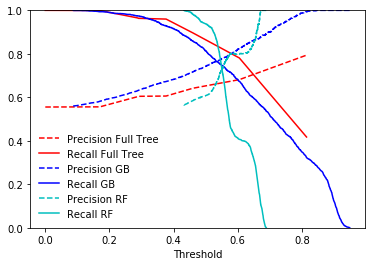

In [33]:
precisions_GB, recalls_GB, thresholds_GB = precision_recall_curve(y_true = Y_test, probas_pred = y_gb_proba[:,1])
precisions_RF, recalls_RF, thresholds_RF = precision_recall_curve(y_true = Y_test, probas_pred = y_rf_proba[:,1])
precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])

plt.plot (thresholds, precisions[:-1], "r"+"--", label="Precision Full Tree")
plt.plot (thresholds, recalls[:-1], "r"+"-", label="Recall Full Tree ")
plt.plot (thresholds_GB, precisions_GB[:-1], "b"+"--", label="Precision GB")
plt.plot (thresholds_GB, recalls_GB[:-1], "b"+"-", label="Recall GB")
plt.plot (thresholds_RF, precisions_RF[:-1], "c"+"--", label="Precision RF")
plt.plot (thresholds_RF, recalls_RF[:-1], "c"+"-", label="Recall RF")

plt.xlabel("Threshold")
plt.legend(frameon=False)
plt.ylim([0,1])


## Linear Regression

In [34]:
# Linear Regression imports
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
from sklearn.metrics import mean_squared_error

In [35]:
data=pd.read_csv('data/Bdata_for_ML.csv',header=0) #for 54 files
data=data.drop(['Unnamed: 0',],axis=1)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Columns: 248 entries, is_starred to deadline_day_in_week_7
dtypes: bool(2), float64(9), int64(237)
memory usage: 18.0 MB


In [37]:
#define range of data
data_r=data[data['pledge_perc']<300]
data_r=data_r[data_r['pledge_perc']>=100]

In [38]:
mask = data_r.columns.str.contains('category.name')
mask[1]=True #add goal to parameters
mask[4]=True #add staff pick to parameters
mask[18]=True #add launched-created
mask[27]=True #add deadline-launched
lin_reg_params=data_r.columns[mask]
lin_reg_params

Index(['goal', 'staff_pick', 'launched-created', 'deadline-launched',
       'category.name_3D Printing', 'category.name_Academic',
       'category.name_Accessories', 'category.name_Action',
       'category.name_Animals', 'category.name_Animation',
       ...
       'category.name_Wearables', 'category.name_Weaving', 'category.name_Web',
       'category.name_Webcomics', 'category.name_Webseries',
       'category.name_Woodworking', 'category.name_Workshops',
       'category.name_World Music', 'category.name_Young Adult',
       'category.name_Zines'],
      dtype='object', length=148)

In [39]:
#define parameters for regression
y = data_r [['pledge_perc']]
#X = data_r[['goal','deadline-launched','launched-created','category.id']]
X = data_r[lin_reg_params]

In [40]:
#split to train and test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state=8)

In [41]:
#perform regression
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
print("predicted y = ", lin_reg.coef_, " * X + ", lin_reg.intercept_)

predicted y =  [[ -7.00387798e+00   1.52894860e+01   1.48681618e-03  -3.25684151e+00
   -1.01878687e+10  -1.01878688e+10  -1.01878687e+10  -1.01878688e+10
   -1.01878688e+10  -1.01878688e+10  -1.01878688e+10  -1.01878688e+10
   -1.01878688e+10  -1.01878688e+10  -1.01878688e+10  -1.01878688e+10
   -7.03727323e+11  -1.01878688e+10  -1.01878688e+10  -1.01878688e+10
   -1.01878688e+10  -1.01878687e+10  -1.01878688e+10  -1.01878688e+10
   -1.01878688e+10  -1.01878688e+10  -1.01878688e+10  -1.01878688e+10
   -1.01878688e+10  -1.01878688e+10  -1.01878688e+10  -1.01878688e+10
   -1.01878688e+10  -1.01878688e+10  -1.01878688e+10  -1.01878688e+10
   -1.01878687e+10  -1.01878688e+10  -1.01878688e+10  -1.01878688e+10
   -1.01878688e+10  -1.01878688e+10   1.12225010e+09  -1.01878688e+10
   -1.01878688e+10  -1.01878687e+10  -1.01878688e+10  -1.01878688e+10
   -1.01878688e+10  -1.01878688e+10  -1.01878688e+10  -1.01878688e+10
   -1.01878688e+10  -1.01878688e+10  -1.01878688e+10  -1.01878688e+10
   -1

In [43]:
y_test_pred_numeric = lin_reg.predict(X_test)

In [44]:
lin_reg.score(X_test, y_test)
#R square score

-97338797098585.813

In [45]:
mean_squared_error(y_test, y_test_pred_numeric)

1.8105996875331571e+17

[Text(0,0.5,'Residual = Y-predicted - Y-test'),
 Text(0.5,0,'Y-test'),
 Text(0.5,1,'Linear Regression')]

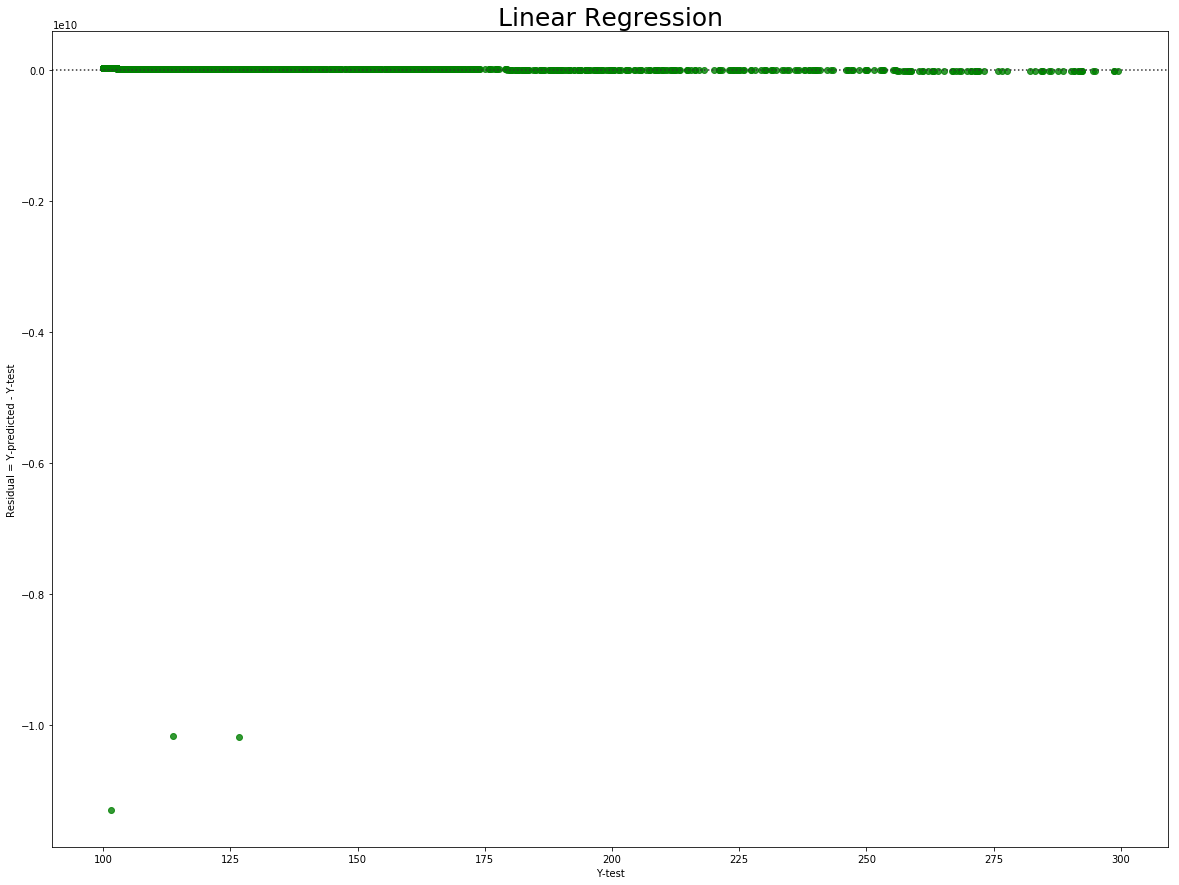

In [46]:
plt.subplots(figsize=(20,15))
ax= sns.residplot(y_test, y_test-y_test_pred_numeric, color="g")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":25,"axes.labelsize":15})
ax.set(xlabel='Y-test', ylabel='Residual = Y-predicted - Y-test',title="Linear Regression")

# Polynomial Regression

In [60]:
#define parameters for regression
y = data_r [['pledge_perc']]
X = data_r[['goal','deadline-launched','launched-created']]
#split to train and test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state=8)

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=4)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)

# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_train_p, y_train)

# Obtain coefficients
#lg.coef_


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
# Predict
y_test_pred_numeric_p=lg.predict(X_test_p)

[Text(0,0.5,'Residual = Y-predicted - Y-test'),
 Text(0.5,0,'Y-test'),
 Text(0.5,1,'Polynomial Regression')]

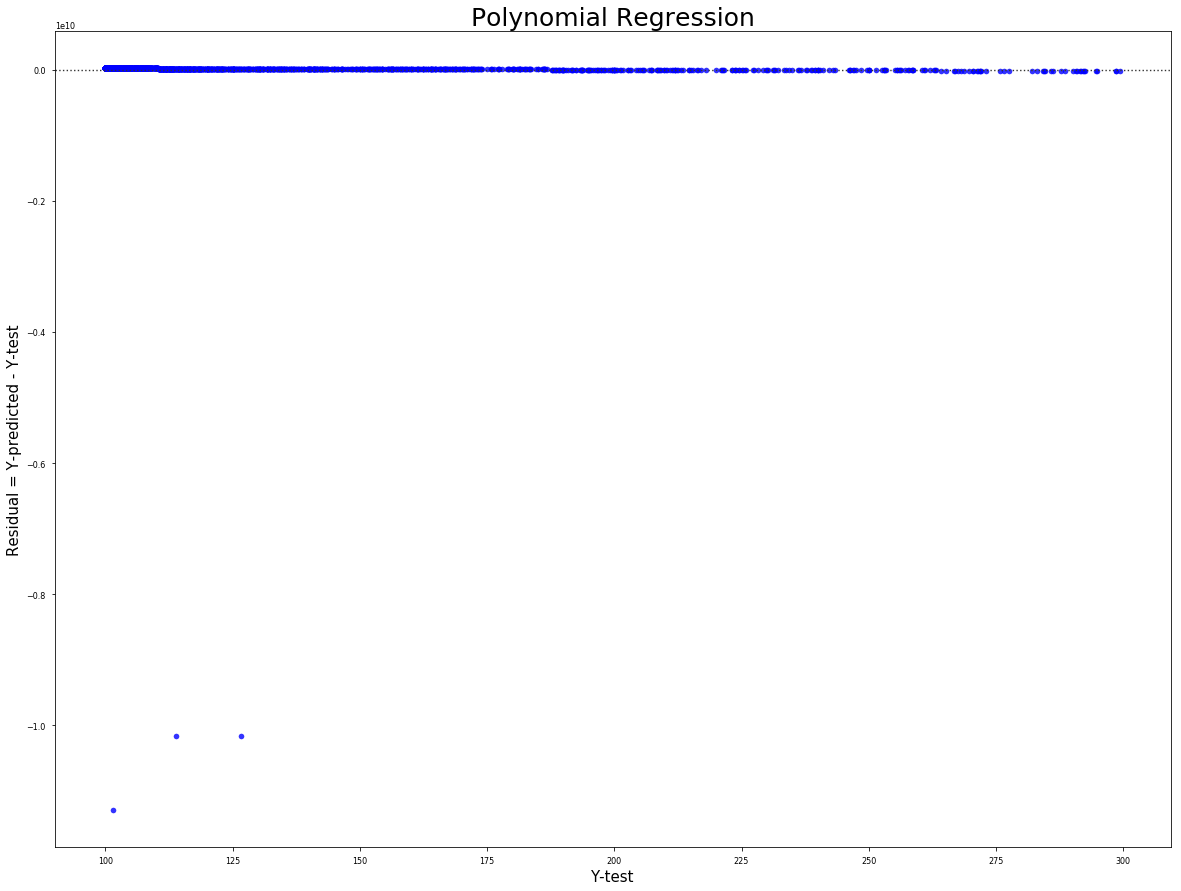

In [68]:
plt.subplots(figsize=(20,15))
ax= sns.residplot(y_test, y_test-y_test_pred_numeric, color="b")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":25,"axes.labelsize":15})
ax.set(xlabel='Y-test', ylabel='Residual = Y-predicted - Y-test',title="Polynomial Regression")